[0.35 0.15]
[0.35 0.25]
[0.15 0.25]
[0.25 0.15]
[0.25 0.15]
[0.35 0.95]
[0.25 0.35]
[0.15 0.25]
[0.25 0.15]
[0.35 0.25]


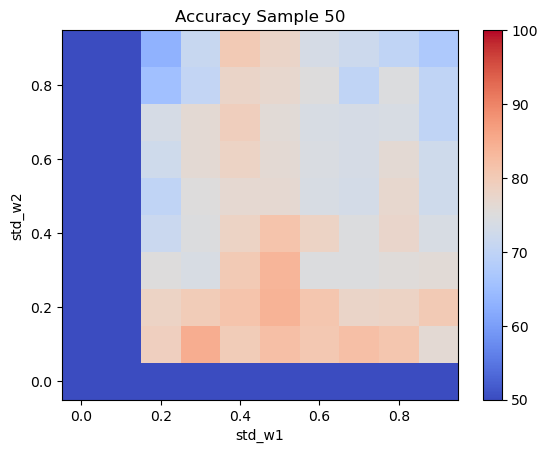

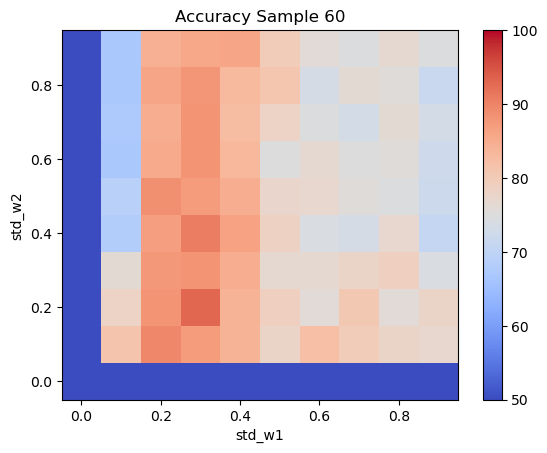

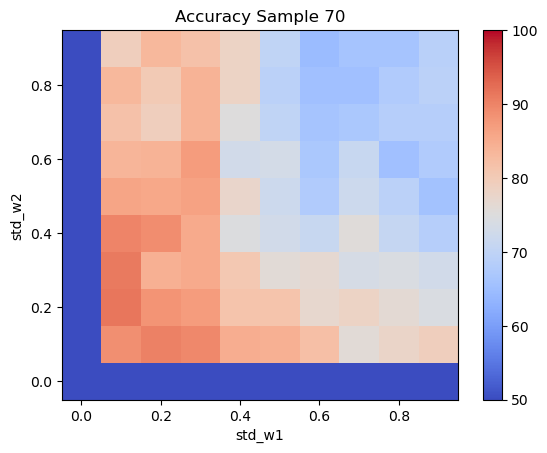

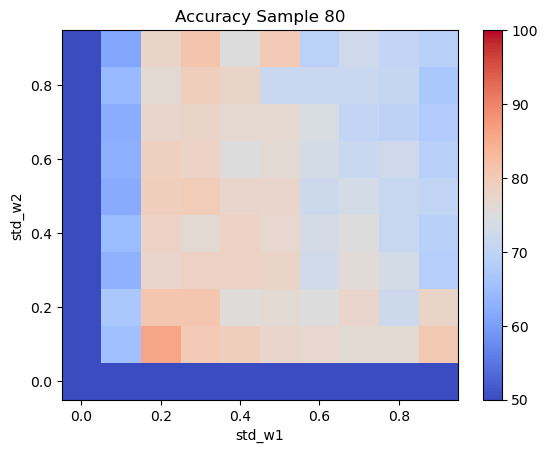

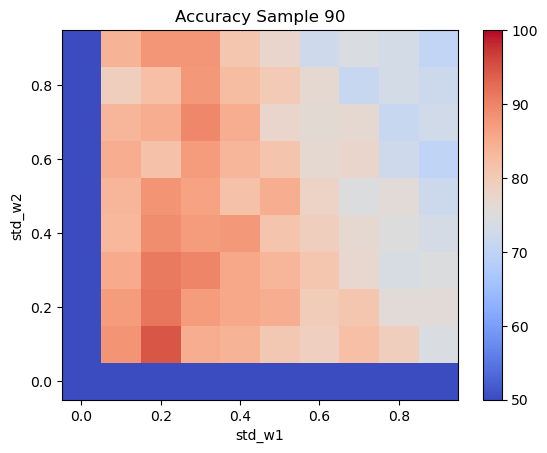

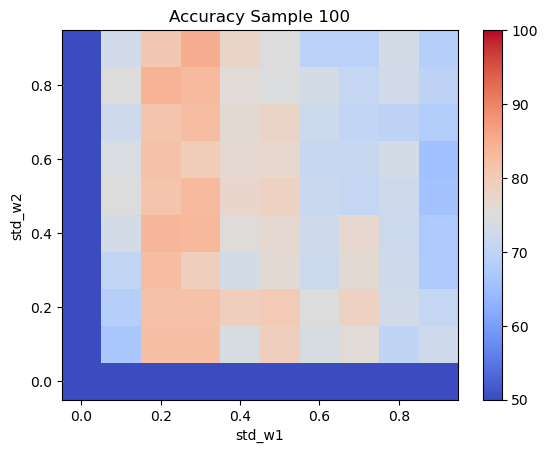

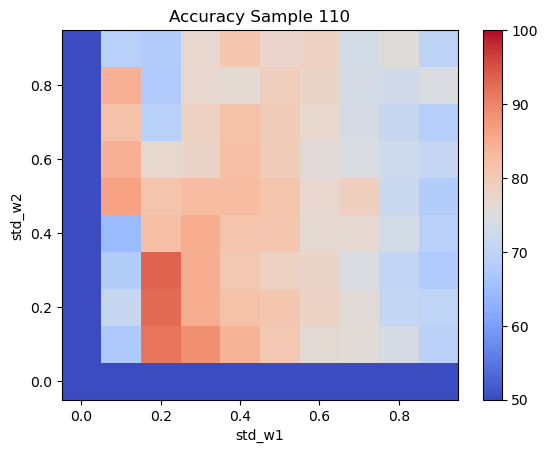

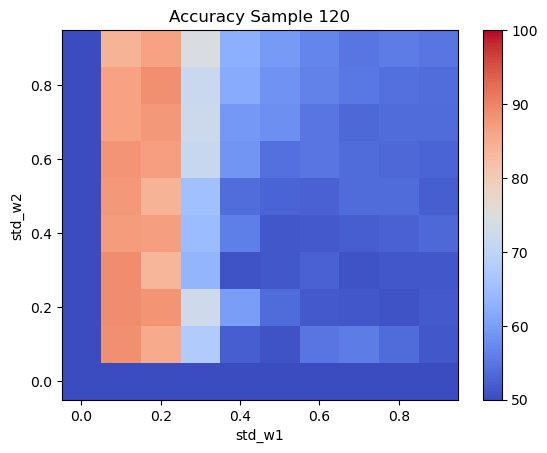

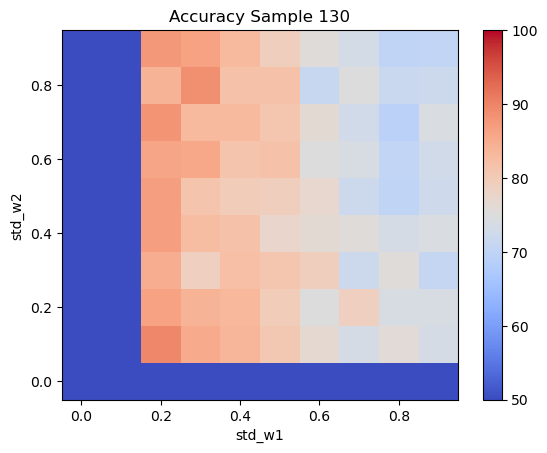

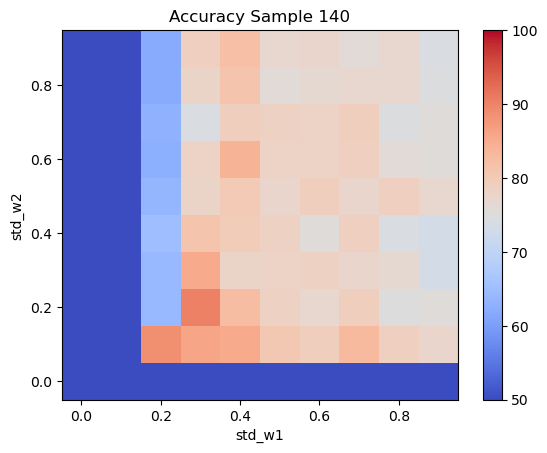

In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input100sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i, sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T*10000, cmap ='coolwarm', vmin=50, vmax=100)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]*10000
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    array = (np.array(best_w1_w2)+np.array([0.5,0.5]))*0.1+0
    print(array)

In [2]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)


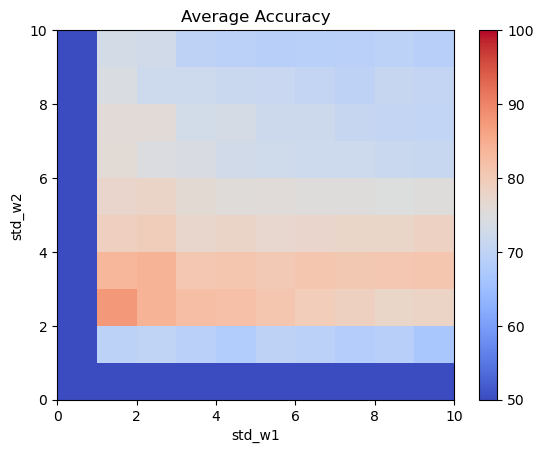

In [14]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm',vmin=50, vmax=100)
plt.colorbar(a)
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Accuracy')

fig.savefig("100_inputs_average_accuracy_grid_over_10_samples.png".format(sample))

In [15]:
average_accuracy_grid_10_by_10_10_samples

array([[49.21875  , 49.21875  , 49.21875  , 49.21875  , 49.21875  ,
        49.21875  , 49.21875  , 49.21875  , 49.21875  , 49.21875  ],
       [49.21875  , 69.3359375, 69.9609375, 69.0234375, 67.7734375,
        69.6484375, 69.21875  , 68.2421875, 68.671875 , 66.40625  ],
       [49.21875  , 87.578125 , 83.984375 , 82.34375  , 81.8359375,
        80.859375 , 79.5703125, 78.828125 , 77.5390625, 78.0078125],
       [49.21875  , 83.5546875, 84.0625   , 80.703125 , 80.9765625,
        80.390625 , 80.8984375, 80.546875 , 80.6640625, 80.859375 ],
       [49.21875  , 79.0234375, 79.375    , 77.3046875, 77.890625 ,
        77.109375 , 77.5      , 77.6953125, 77.5390625, 78.59375  ],
       [49.21875  , 77.34375  , 77.7734375, 76.2109375, 75.5078125,
        75.703125 , 75.234375 , 75.234375 , 74.8046875, 75.2734375],
       [49.21875  , 76.09375  , 74.4921875, 74.1015625, 72.8125   ,
        72.5390625, 72.1875   , 72.2265625, 71.640625 , 71.2109375],
       [49.21875  , 75.8984375, 75.820312

In [4]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [5]:
best_w1_w2

(2, 1)

In [6]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

87.578125
49.21875


Text(0.5, 1.0, 'Average Test Accuracy')

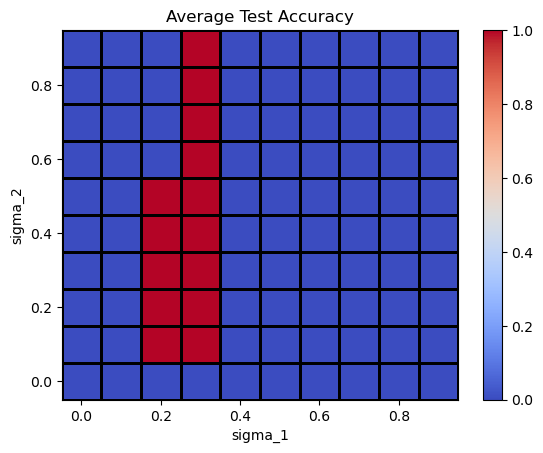

In [13]:
print(np.max(average_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_accuracy_grid_10_by_10_10_samples)
print(np.min(average_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.8
result_filter=average_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter.T, cmap ='coolwarm', edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


In [7]:
average_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [8]:
array = np.array([[0.35, 0.15],
[0.35, 0.25],
[0.15, 0.25],
[0.25, 0.15],
[0.25, 0.15],
[0.35, 0.95],
[0.25, 0.35],
[0.15, 0.25],
[0.25, 0.15],
[0.35, 0.25]])

In [9]:
for (i,element) in enumerate(array):
    data = {}
    data['frequency'] = 65
    data['N'] = 100
    data['accuracy'] = max_accuracy
    data['w1'] = element[0]/0.3445
    data['error_bar_w1'] = 0.0075/0.3445
    data['w2'] = element[1]/0.3445
    data['error_bar_w2'] = 0.0075/0.3445
    np.savez("average_accuracy_100_seed_{}.npz".format(i),**data)

In [10]:
data = {}
data['N'] = 100
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = 0.05/0.3445
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = 0.05/0.3445
np.savez("100_input_neurons_w1_w2.npz",**data)